# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the data

In [3]:
df=pd.read_csv("student-mat.csv",sep=';')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape

(395, 33)

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Data Visualization

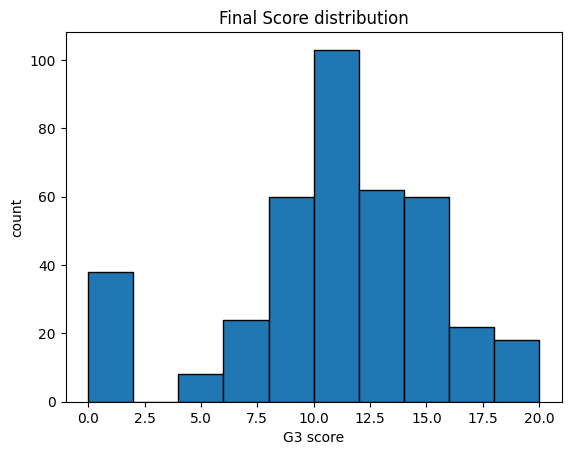

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.hist(df['G3'], edgecolor='black')
plt.title('Final Score distribution')
plt.xlabel('G3 score')
plt.ylabel('count')
plt.show()

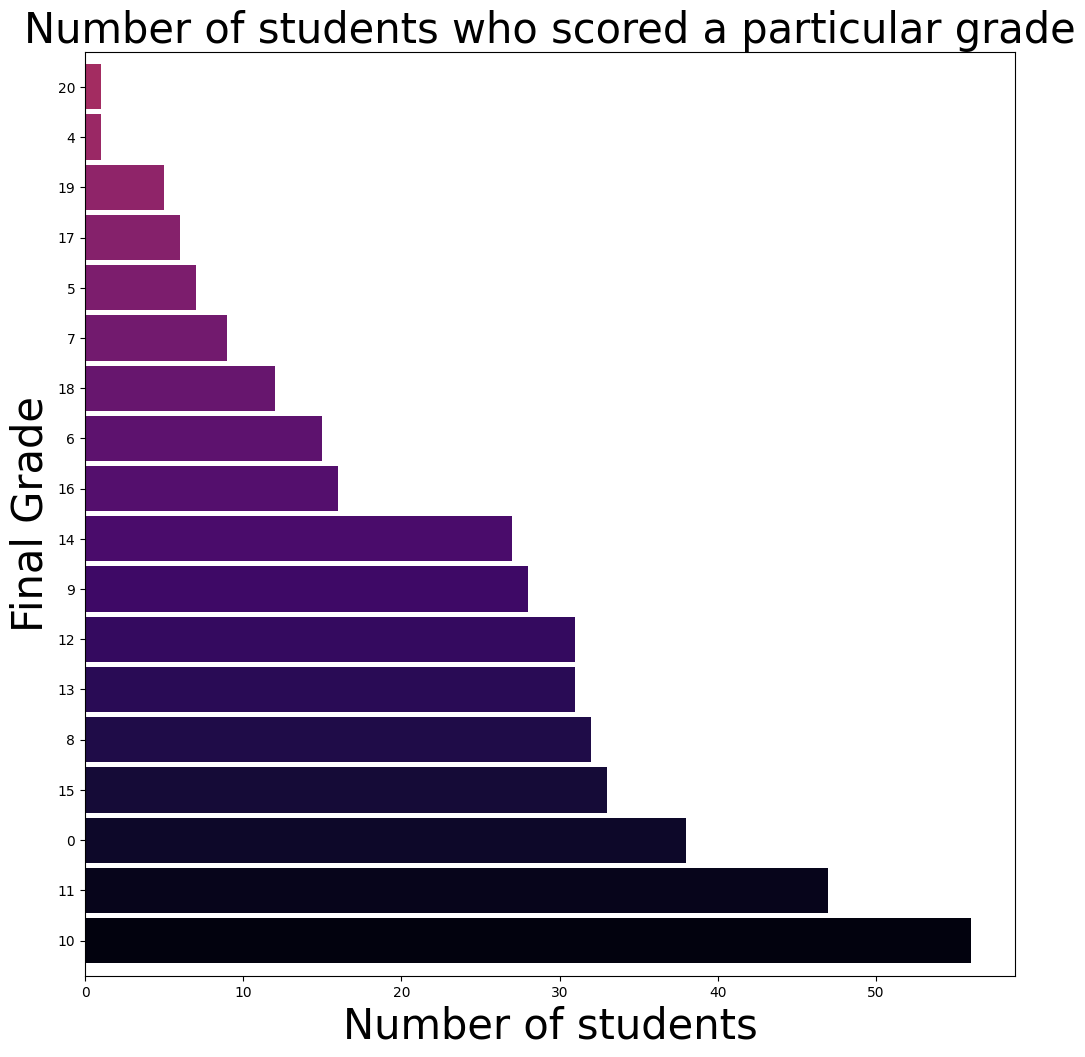

In [9]:
plt.subplots(figsize=(12,12))
grade_counts = df['G3'].sort_values().value_counts().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

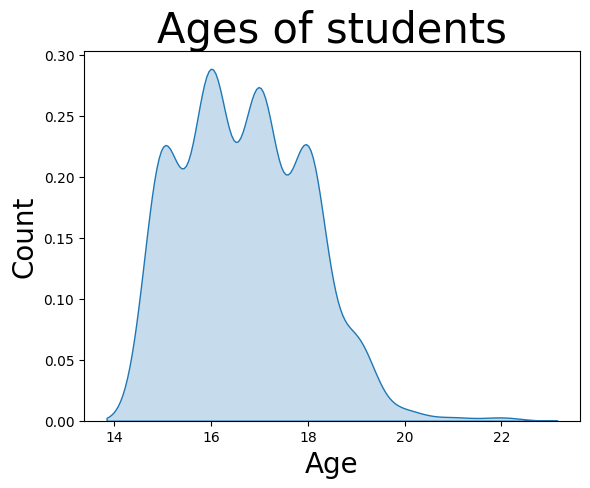

In [10]:
b = sns.kdeplot(df['age'], fill=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

# Linear regression with multiple variable

In [11]:
from sklearn.preprocessing import LabelEncoder
lencoders={}

for col in df.select_dtypes(include='object').columns:
    lencoders[col]=LabelEncoder()
    df[col]=lencoders[col].fit_transform(df[col])

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
x = np.array(df.drop(labels=['G3'], axis=1))

y = np.array(df['G3'])

# Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)

LinearRegression()

In [15]:
y_pred = linear_regression.predict(xtest)

# Model Evaluation

In [16]:
from sklearn.metrics import mean_squared_error, r2_score


# Calculate R-squared (R2) Score
r2 = r2_score(ytest, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.8286959445647327
